In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [73]:
fileName = "./data/gm2offline_ana_18398265_1544564276.1650.root"
f = r.TFile(fileName)
#f = r.TFile("./data/results_40M_gasGun_May1.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
#t.Print()

In [87]:
rmagic = 7112
rmin = -45. + rmagic
rmax = 45. + rmagic
rbins = 5
rstep = (rmax - rmin)/rbins

vmin = -45.
vmax = 45.
vbins = 5
vstep = (vmax - vmin)/vbins

thetamin = 0.
thetamax = 2*r.TMath.Pi()
thetabins = 5# 63
thetastep = (thetamax - thetamin)/thetabins

In [88]:
print(rstep, vstep, thetastep)

18.0 18.0 1.2566370614359172


In [89]:
parsList = r.TList()

pars = [rmin, rmax, rbins, vmin, vmax, vbins, thetamin, thetamax, thetabins]
parNames = ["rmin", "rmax", "rbins", "vmin", "vmax", "vbins", "thetamin", "thetamax", "thetabins"]

params = [r.TParameter(float)(x, y) for (x,y) in zip(parNames,pars)]
for param in params:
    parsList.Add(param)
print([(x.GetName(),x.GetVal()) for x in parsList])

[('rmin', 7067.0), ('rmax', 7157.0), ('rbins', 5.0), ('vmin', -45.0), ('vmax', 45.0), ('vbins', 5.0), ('thetamin', 0.0), ('thetamax', 6.2831854820251465), ('thetabins', 5.0)]


In [94]:
histVec = []
muVec = []

outfile = fileName.split("/")[len(fileName.split("/")) - 1][:-5]+".txt"
print(outfile)
fout = r.TFile(outfile,"RECREATE")
parsList.Write()
fout.Close()

for rbin in range(rbins):
    for vbin in range(vbins):
        for thetabin in range(thetabins):
            #if(thetabin > 0):
            #    break
            binNumber = rbin*100000+vbin*100+thetabin
            binstring = str(rbin).zfill(3)+"_"+str(vbin).zfill(3)+"_"+str(thetabin).zfill(3)
            print("Starting Bin:", binstring)
            
            rlow = rmin + rstep*(rbin)
            rhigh = rmin + rstep*(rbin+1)
            vlow = vmin + vstep*(vbin)
            vhigh = vmin + vstep*(vbin+1)
            thetalow = thetamin + thetastep*(thetabin)
            thetahigh = thetamin + thetastep*(thetabin+1)
            
            condition = ("muDecayR > "+str(rlow)+" && muDecayR < "+str(rhigh)+
                         " && muDecayY > "+str(vlow)+" && muDecayY < "+str(vhigh)+
                         " && muDecayTheta > "+str(thetalow)+" && muDecayTheta < "+str(thetahigh)
                        )
        
            mui = t.Draw("muDecayR",condition,"goff")    
            he = r.TH1D("he_"+binstring,"Energy Distribution of Decay Positrons from Bin "+str(binstring)+"; E [MeV]; N", 4000,0,4000)
            if(mui > 0):
                posi = t.Draw("eCaloE[0]>>he_"+binstring,condition,"goff")
            else:
                posi = 0
                
            print("     Muons/Positrons in This Bin:", mui,"/",posi)
            #if(posi > 0):
            #    he.Scale(1/mui)
            #    he.GetYaxis().SetTitle("Number of Positrons Scaled by Number of Muons in Bin ["+str(mui)+"]")
                
            muVec.append((mui, posi))
            #save he to tfile with new name
            fout = r.TFile(outfile,"UPDATE")
            he.Write()
            fout.Close()

gm2offline_ana_18398265_1544564276.1650.txt
Starting Bin: 000_000_000
     Muons/Positrons in This Bin: 207 / 97
Starting Bin: 000_000_001
     Muons/Positrons in This Bin: 194 / 74
Starting Bin: 000_000_002
     Muons/Positrons in This Bin: 241 / 103
Starting Bin: 000_000_003
     Muons/Positrons in This Bin: 212 / 98
Starting Bin: 000_000_004
     Muons/Positrons in This Bin: 227 / 104
Starting Bin: 000_001_000
     Muons/Positrons in This Bin: 1298 / 639
Starting Bin: 000_001_001
     Muons/Positrons in This Bin: 1276 / 604
Starting Bin: 000_001_002
     Muons/Positrons in This Bin: 1265 / 632
Starting Bin: 000_001_003
     Muons/Positrons in This Bin: 1292 / 631
Starting Bin: 000_001_004
     Muons/Positrons in This Bin: 1247 / 624
Starting Bin: 000_002_000
     Muons/Positrons in This Bin: 2448 / 1159
Starting Bin: 000_002_001
     Muons/Positrons in This Bin: 2384 / 1129
Starting Bin: 000_002_002
     Muons/Positrons in This Bin: 2500 / 1248
Starting Bin: 000_002_003
     Muons/P

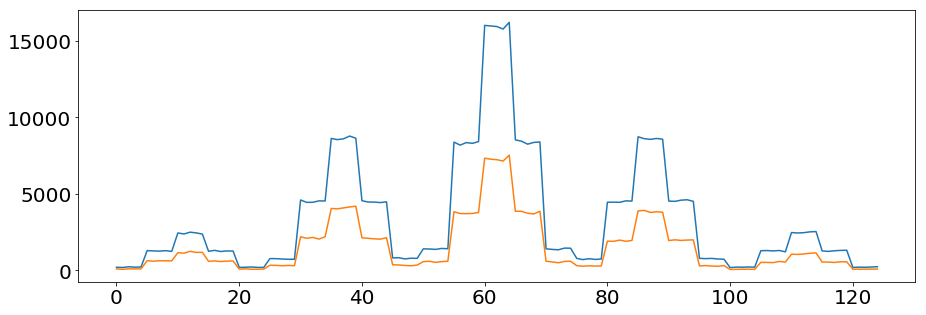

In [95]:
fig,ax = plt.subplots(figsize=(15,5))
mus, poss = zip(*muVec)
plt.plot(mus)
plt.plot(poss)
plt.show()

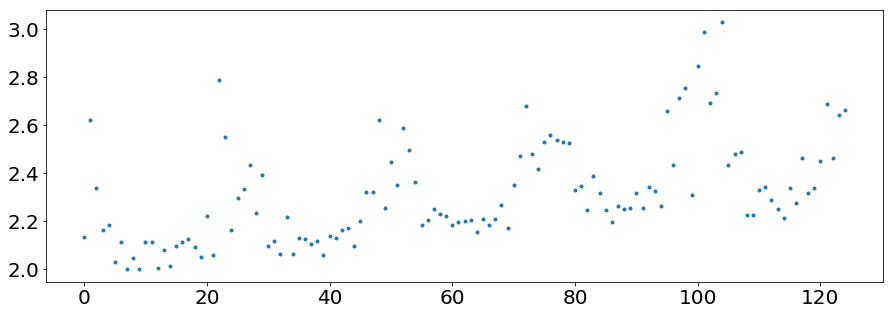

In [96]:
fig,ax = plt.subplots(figsize=(15,5))
mus, poss = zip(*muVec)
ding = []
for (x,y) in muVec:
    if(y > 0):
        ding.append(x/y)
    else:
        ding.append(np.nan)
plt.plot(ding,".")
plt.show()

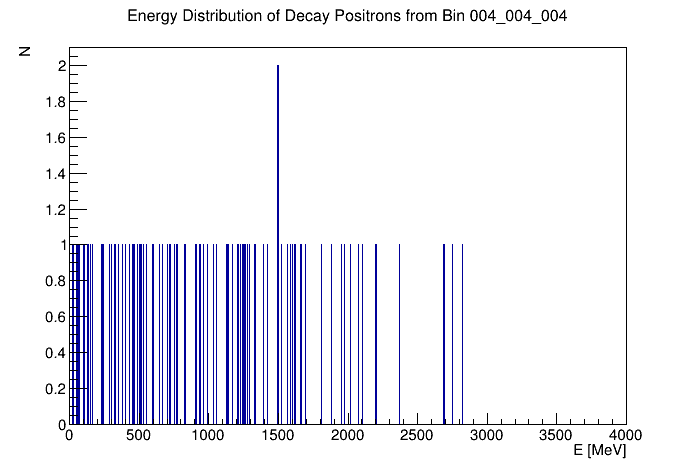

In [97]:
he.GetEntries()
c = r.TCanvas()
he.Draw()
c.Draw()